# Softmax and Crossentropy

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=c36lUUr864M&t=8654s

## Softmax

$ \Large S(y_{i}) = \frac{e^{y_{i}}}{\sum e^{y_{j}}} $

Softmax applies the exponential function to each element and normalizes it by dividing the sum of all these exponentials. It basically squashes the output to be between 0 and 1. This way we get probabilities.

## Softmax Layer

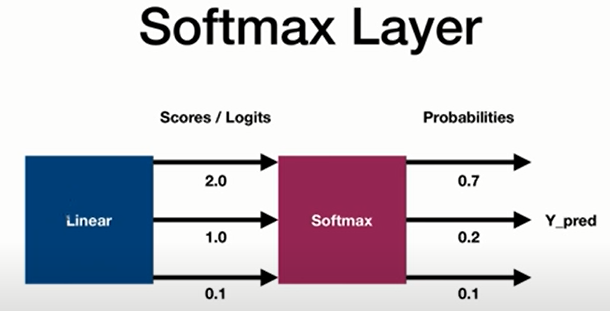

Let's say that we have a linear layer which has three output values. These values are so-called **scores** or **logits** because they are raw values. Then we apply the softmax and get probabilities. Each value is squashed to be between zero and one. The highest value from picture above gets the highest probability. After that we can choose for the class with the highest probability.

### Numpy

In [1]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print("softmax numpy:", outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]


### PyTorch

In [2]:
x = torch.tensor([2.0, 1.0, 0.1])
# we have to specify the dimension
outputs = torch.softmax(x, dim=0)
print("softmax torch:", outputs)

softmax torch: tensor([0.6590, 0.2424, 0.0986])


## Cross-Entropy

$ \large D(\hat{Y},Y) = -\frac{1}{N}  \cdot \sum Y_{i} \cdot log(\hat{Y}) $

$ \large \begin{matrix} Y=[1,0,0] \\ \hat{Y}=[0.7,0.2,0.1] \end{matrix} \Longrightarrow D(\hat{Y},Y)= \color{green}{\text{0.35}}$

$ \large \begin{matrix} Y=[1,0,0] \\ \hat{Y}=[0.1,0.3,0.7] \end{matrix} \Longrightarrow D(\hat{Y},Y)=\color{red}{\text{2.3}}$

Softmax is often combines with the so-called **cross-entropy loss**. **Cross-Entropy loss** measures the performance of our classification model whse output is a probability between zero and one. It can be used also in multi-class problems. The loss increases as the predicted probability diverges from the actual label. The better our prediction the lower is our loss. In this case our Y must be One-Hot Encoded.

Let's say that we have three possible classes 0, 1 and 2 so if in our case first label in Y is 0 and other classes are 1 and 2 we have to put 1 and two 0's to encode class labels ast One-Hot. For our predicted Y we must have probabilities.

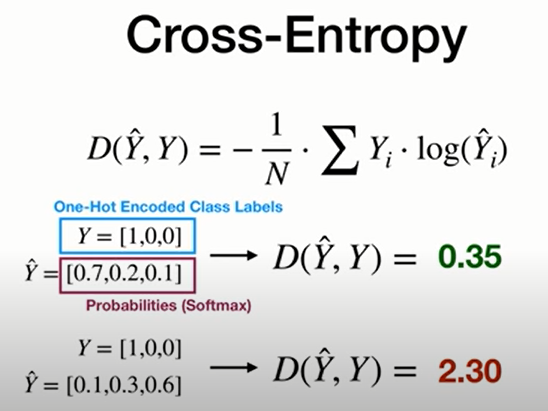

### Numpy

In [5]:
import torch
import torch.nn as nn
import numpy as np

def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss # if we want normalize it we should add also -> / float(predicted.shape[0])

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 2]

Y = np.array([1, 0, 0])

# y_pred has probabilities
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f"Loss1 numpy: {l1:.4f}")
print(f"Loss2 numpy: {l2:.4f}")

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


### PyTorch

**Be Careful!**

+ <span style="color:green"> **nn.CrossEntropyLoss applies nn.LogSoftmax + nn.NLLLoss** </span>(negative log likelihood loss)<br/>
+ <span style="color:red"> **No Softmax in last layer!** </span><br/>
+ Y has class labels, <span style="color:red"> **not One-Hot!** </span> <br/>
+ Y_pred has raw scores (logits), <span style="color:red"> **no Softmax!** </span>

In [9]:
import torch
import torch.nn as nn
import numpy as np

loss = nn.CrossEntropyLoss()  

Y = torch.tensor([0])

# n_samples x n_classes = 1 x 3
# raw values
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f"Loss1 PyTorch: {l1.item()}")
print(f"Loss2 PyTorch: {l2.item()}")

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(f"predicted class: {predictions1}")
print(f"predicted class: {predictions2}")

Loss1 PyTorch: 0.4170299470424652
Loss2 PyTorch: 1.840616226196289
predicted class: tensor([0])
predicted class: tensor([1])


### Cross entropy with multiple samples

Loss in PyTorch allows for multiple samples

In [10]:
import torch
import torch.nn as nn
import numpy as np

loss = nn.CrossEntropyLoss()  

# 3 samples
Y = torch.tensor([2, 0, 1])

# n_samples x n_classes = 3 x 3
# raw values
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f"Loss1 PyTorch: {l1.item()}")
print(f"Loss2 PyTorch: {l2.item()}")

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(f"predicted class: {predictions1}")
print(f"predicted class: {predictions2}")

Loss1 PyTorch: 0.3018244206905365
Loss2 PyTorch: 1.6241613626480103
predicted class: tensor([2, 0, 1])
predicted class: tensor([0, 2, 1])


## Typical Neural Net With Softmax

Below we have typical neural net in a multi-class classification problem. Here we want to find out what animal our image shows. We an input layer and then some hidden layers and maybe some activation functions in between. Then at the end we have a linear layer with one output for each class. And then at the very end we apply our softmax and get the probabilities. </br>
In PyTorch we must be careful because we use the **Cross Entropy Lose** so we must not use the **Softmax** layer in our neural net, so we must not implement this for ourselves.

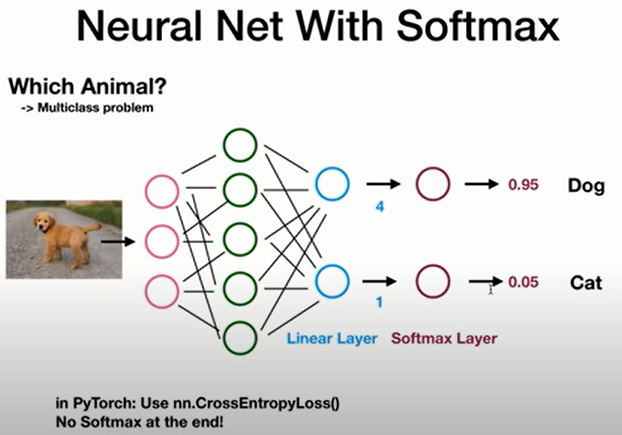

In [12]:
import torch
import torch.nn as nn

# Multiclass problem
class NeuralNet2(nn.Module):
    # we define our layers here
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        # linear layer which gets input size and gives back hiden size
        self.linear1 = nn.Linear(input_size, hidden_size)
        # activation function
        self.relu = nn.ReLU()
        # last layer gets hidden size and gives back num_classes size 
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
        
    def forward(self, x):
        # here we only aplly our layers
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out
    
model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() # (applies Softmax)

## Two class problem as binary classification

If we just have a binary classification problem with two possible outputs then we can change our layer like one below. Now we rephrase our question. We just say **Is it a dog?** then at the end we have a linear layer with only one output and then we do not use the softmax function but we use **the Sigmoid Function**. Sigmoid Function gets probability and if it is higher than 0.5 then we say yes. </br>
In PyTorch we use the BCELoss() or **Binary Cross Entropy Loss**. We must implement the Sigmoid Function at the end.

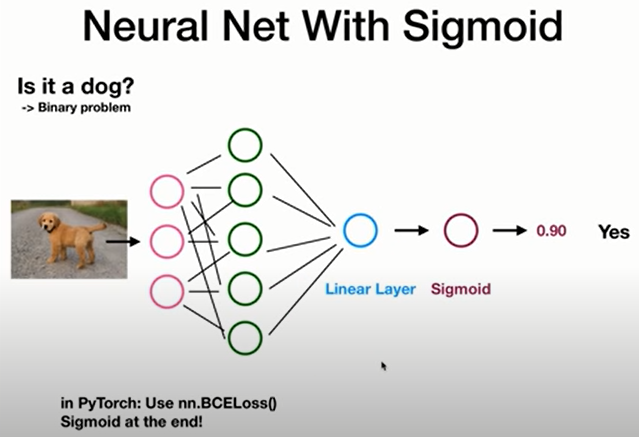

In [17]:
import torch
import torch.nn as nn

# Binary classification
class NeuralNet1(nn.Module):
    # we define our layers here
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        # linear layer which gets input size and gives back hiden size
        self.linear1 = nn.Linear(input_size, hidden_size)
        # activation function
        self.relu = nn.ReLU()
        # last layer gets hidden size and gives back fixed num_classes=1 size 
        self.linear2 = nn.Linear(hidden_size, 1)
        
        
    def forward(self, x):
        # here we only aplly our layers
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred
    
model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss() # (applies BCE)